# Data Visualisation

In [1]:
# Set up environment...

import warnings
warnings.filterwarnings('ignore')

# Libraries

* Matplotlib
* Pandas
* Seaborn
* Bokeh
* Plotly
* Basemap


# Simple Simulation

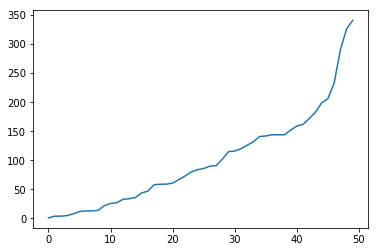

In [2]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline
 
np.random.seed(seed=6)
def tick(people):
    tickets = np.random.randint(0, people.size, people.size)
    givers = people != 0
    people[givers] -= 1
    np.add.at(people, tickets[np.where(givers)], 1)
    return people
 

# Start off with 50 people and give them each $100
number_people = 50
people = np.ones(number_people, dtype='int') * 100
    
# Run the simulation 5000 times...    
for i in range(50000):
    people = tick(people)

# Plotting code starts here...
plt.plot(sorted(people))
plt.savefig('simulation.svg') 

In [ ]:
!open simulation.html 

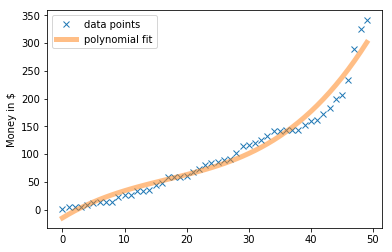

In [3]:
x = list(range(0,number_people))
y = sorted(people)
poly_deg = 3
coefs = np.polyfit(x, y, poly_deg)
y_poly = np.polyval(coefs, x)

plt.plot(x, y, "x", label="data points")
plt.plot(x, y_poly, label="polynomial fit", linewidth=5, alpha=0.5)
plt.ylabel('Money in $')
l = plt.legend()

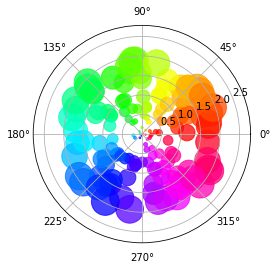

In [4]:
"""
==========================
Scatter plot on polar axis
==========================

Demo of scatter plot on a polar axis.

Size increases radially in this example and color increases with angle
(just to verify the symbols are being scattered correctly).

From: https://matplotlib.org/examples/pie_and_polar_charts/polar_scatter_demo.html
"""

import numpy as np
import matplotlib.pyplot as plt

# Compute areas and colors
N = 150
r = 2 * np.random.rand(N)
theta = 2 * np.pi * np.random.rand(N)
area = 200 * r**2
colors = theta

ax = plt.subplot(111, projection='polar')
c = ax.scatter(theta, r, c=colors, s=area, cmap='hsv', alpha=0.75)

plt.show()

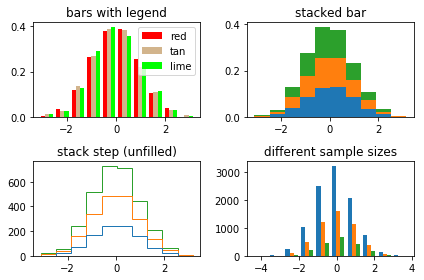

In [5]:
"""
=============================================================
Demo of the histogram (hist) function with multiple data sets
=============================================================

Plot histogram with multiple sample sets and demonstrate:

    * Use of legend with multiple sample sets
    * Stacked bars
    * Step curve with no fill
    * Data sets of different sample sizes

Selecting different bin counts and sizes can significantly affect the
shape of a histogram. The Astropy docs have a great section on how to
select these parameters:
http://docs.astropy.org/en/stable/visualization/histogram.html
"""

import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

np.random.seed(0)

n_bins = 10
x = np.random.randn(1000, 3)

fig, axes = plt.subplots(nrows=2, ncols=2)
ax0, ax1, ax2, ax3 = axes.flatten()

colors = ['red', 'tan', 'lime']
ax0.hist(x, n_bins, normed=1, histtype='bar', color=colors, label=colors)
ax0.legend(prop={'size': 10})
ax0.set_title('bars with legend')

ax1.hist(x, n_bins, normed=1, histtype='bar', stacked=True)
ax1.set_title('stacked bar')

ax2.hist(x, n_bins, histtype='step', stacked=True, fill=False)
ax2.set_title('stack step (unfilled)')

# Make a multiple-histogram of data-sets with different length.
x_multi = [np.random.randn(n) for n in [10000, 5000, 2000]]
ax3.hist(x_multi, n_bins, histtype='bar')
ax3.set_title('different sample sizes')

fig.tight_layout()
# plt.show()
plt.plot()
plt.savefig("histogram.pdf")

In [ ]:
!open histogram.pdf

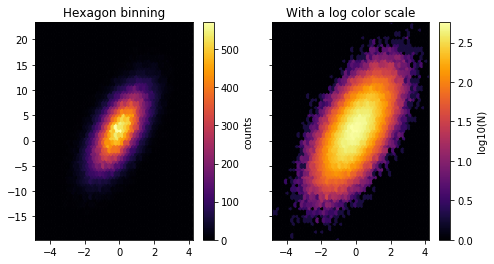

In [6]:
"""
hexbin is an axes method or pyplot function that is essentially
a pcolor of a 2-D histogram with hexagonal cells.  It can be
much more informative than a scatter plot; in the first subplot
below, try substituting 'scatter' for 'hexbin'.
"""

import numpy as np
import matplotlib.pyplot as plt

np.random.seed(0)
n = 100000
x = np.random.standard_normal(n)
y = 2.0 + 3.0 * x + 4.0 * np.random.standard_normal(n)
xmin = x.min()
xmax = x.max()
ymin = y.min()
ymax = y.max()

fig, axs = plt.subplots(ncols=2, sharey=True, figsize=(7, 4))
fig.subplots_adjust(hspace=0.5, left=0.07, right=0.93)
ax = axs[0]
hb = ax.hexbin(x, y, gridsize=50, cmap='inferno')
ax.axis([xmin, xmax, ymin, ymax])
ax.set_title("Hexagon binning")
cb = fig.colorbar(hb, ax=ax)
cb.set_label('counts')

ax = axs[1]
hb = ax.hexbin(x, y, gridsize=50, bins='log', cmap='inferno')
ax.axis([xmin, xmax, ymin, ymax])
ax.set_title("With a log color scale")
cb = fig.colorbar(hb, ax=ax)
cb.set_label('log10(N)')

plt.show()

In [ ]:
!open https://xkcd.com/418/

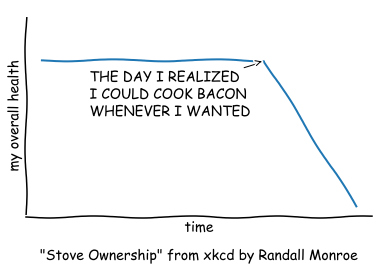

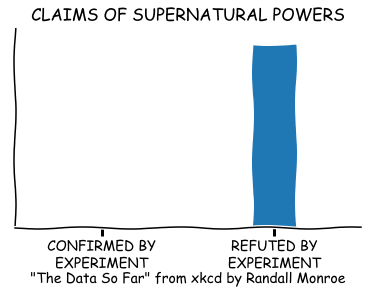

In [7]:
"""
====
XKCD
====

Shows how to create an xkcd-like plot.
"""
import matplotlib.pyplot as plt
import numpy as np

with plt.xkcd():
    # Based on "Stove Ownership" from XKCD by Randall Monroe
    # http://xkcd.com/418/

    fig = plt.figure()
    ax = fig.add_axes((0.1, 0.2, 0.8, 0.7))
    ax.spines['right'].set_color('none')
    ax.spines['top'].set_color('none')
    plt.xticks([])
    plt.yticks([])
    ax.set_ylim([-30, 10])

    data = np.ones(100)
    data[70:] -= np.arange(30)

    plt.annotate(
        'THE DAY I REALIZED\nI COULD COOK BACON\nWHENEVER I WANTED',
        xy=(70, 1), arrowprops=dict(arrowstyle='->'), xytext=(15, -10))

    plt.plot(data)

    plt.xlabel('time')
    plt.ylabel('my overall health')
    fig.text(
        0.5, 0.05,
        '"Stove Ownership" from xkcd by Randall Monroe',
        ha='center')

    # Based on "The Data So Far" from XKCD by Randall Monroe
    # http://xkcd.com/373/

    fig = plt.figure()
    ax = fig.add_axes((0.1, 0.2, 0.8, 0.7))
    ax.bar([0, 1], [0, 100], 0.25)
    ax.spines['right'].set_color('none')
    ax.spines['top'].set_color('none')
    ax.xaxis.set_ticks_position('bottom')
    ax.set_xticks([0, 1])
    ax.set_xlim([-0.5, 1.5])
    ax.set_ylim([0, 110])
    ax.set_xticklabels(['CONFIRMED BY\nEXPERIMENT', 'REFUTED BY\nEXPERIMENT'])
    plt.yticks([])

    plt.title("CLAIMS OF SUPERNATURAL POWERS")

    fig.text(
        0.5, 0.01,
        '"The Data So Far" from xkcd by Randall Monroe',
        ha='center')

plt.show()

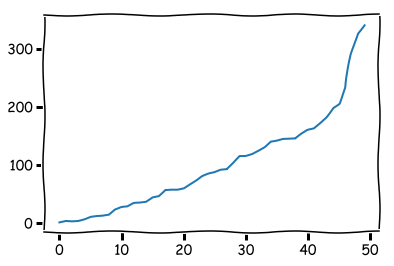

In [8]:
# Replot simulation using xkcd

import matplotlib.pyplot as plt
import numpy as np

plt.plot(sorted(people))

# Melbourne Water dam levels (Pandas)

In [2]:
# Set up environment...

import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [4]:
import pandas as pd
%matplotlib inline 


df = pd.read_csv('daily_storage.csv', 
                 names=['name', 'tvol', 'cvol', 'change', 'pfull', 'rain'], 
                 header=0, engine='python', skipfooter=1)

df

,name,tvol,cvol,change,pfull,rain
0,Thomson,1068000,709787,-863,66.46,0.0
1,Cardinia,286911,178883,-64,62.35,NaN
2,Upper Yarra,200579,124328,206,61.98,3.0
3,Sugarloaf,96253,87060,-123,90.45,NaN
4,Silvan,40445,34931,-201,86.37,NaN
5,Tarago,37580,36260,-36,96.49,NaN
6,Yan Yean,30266,26325,-102,86.98,NaN
7,Greenvale,26839,24597,-105,91.65,NaN
8,Maroondah,22179,19574,-130,88.25,0.0
9,O'Shannassy,3123,2788,-8,89.27,2.0


Text(0,0.5,'Percent Full')

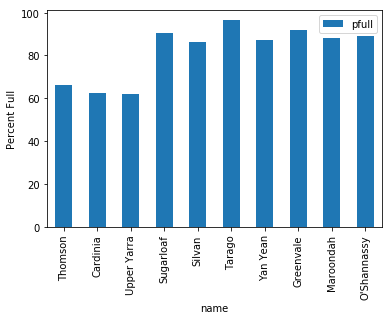

In [5]:
ax = df.plot('name', 'pfull', kind='bar')
ax.set_ylabel("Percent Full")

Text(0,0.5,'Volume (ML)')

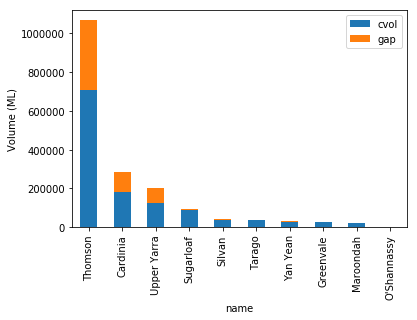

In [6]:
df['gap'] = df['tvol'] - df['cvol']
ax = df.plot('name', ['cvol', 'gap'], kind='bar', stacked=True)
ax.set_ylabel("Volume (ML)")

# Introduce Seaborn

[Seaborn](http://seaborn.pydata.org/examples/index.html)

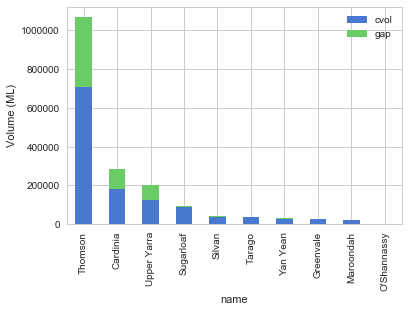

In [7]:
import seaborn as sns
sns.set()
sns.set_style("white")
sns.set(style="whitegrid", palette="muted")

%matplotlib inline

df['gap'] = df['tvol'] - df['cvol']
ax = df.plot('name', ['cvol', 'gap'], kind='bar', stacked=True)
tmp = ax.set_ylabel("Volume (ML)")

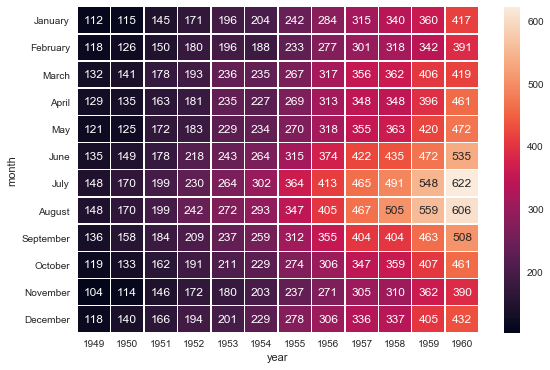

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

# Load the example flights dataset and conver to long-form
flights_long = sns.load_dataset("flights")
flights = flights_long.pivot("month", "year", "passengers")

# Draw a heatmap with the numeric values in each cell
f, ax = plt.subplots(figsize=(9, 6))
tmp = sns.heatmap(flights, annot=True, fmt="d", linewidths=.5, ax=ax)

In [9]:
tips = sns.load_dataset("tips")
tips[:10]

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
5,25.29,4.71,Male,No,Sun,Dinner,4
6,8.77,2.00,Male,No,Sun,Dinner,2
7,26.88,3.12,Male,No,Sun,Dinner,4
8,15.04,1.96,Male,No,Sun,Dinner,2
9,14.78,3.23,Male,No,Sun,Dinner,2


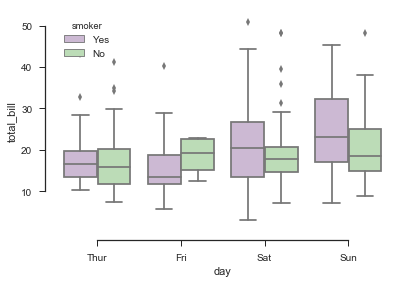

In [10]:
import seaborn as sns

sns.set(style="ticks")

# Load the example tips dataset
tips = sns.load_dataset("tips")

# Draw a nested boxplot to show bills by day and sex
sns.boxplot(x="day", y="total_bill", hue="smoker", data=tips, palette="PRGn")
sns.despine(offset=10, trim=True)

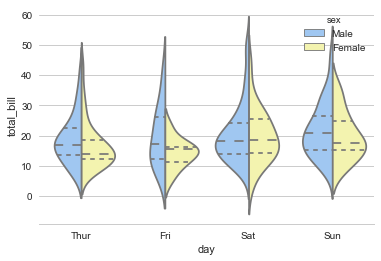

In [11]:
import seaborn as sns
sns.set(style="whitegrid", palette="pastel", color_codes=True)

# Load the example tips dataset
tips = sns.load_dataset("tips")

# Draw a nested violinplot and split the violins for easier comparison
sns.violinplot(x="day", y="total_bill", hue="sex", data=tips, split=True,
               inner="quart", palette={"Male": "b", "Female": "y"})
sns.despine(left=True)

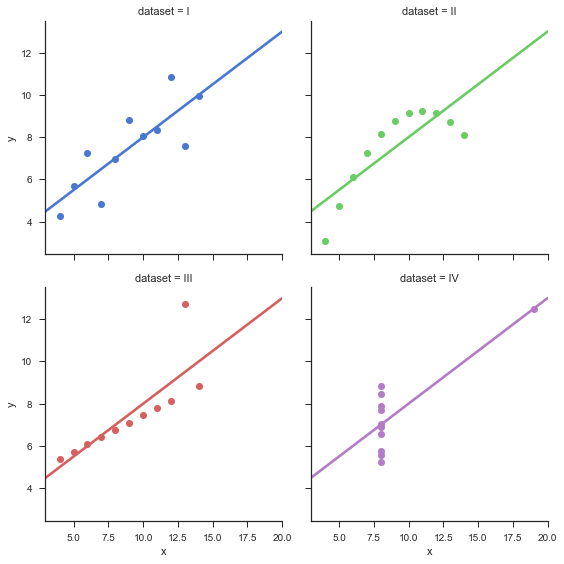

In [12]:
import seaborn as sns
sns.set(style="ticks")

# Load the example dataset for Anscombe's quartet
df = sns.load_dataset("anscombe")

# Show the results of a linear regression within each dataset
sns.lmplot(x="x", y="y", col="dataset", hue="dataset", data=df,
           col_wrap=2, ci=None, palette="muted", size=4,
           scatter_kws={"s": 50, "alpha": 1})

# ACORN-SAT
## Australian Temperature Reference Network¶

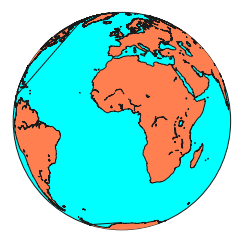

In [13]:
# Show a simple map

from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt

%matplotlib inline

map = Basemap(projection='ortho', 
              lat_0=0, lon_0=0, resolution='l')

#Fill the globe with a blue color 
map.drawmapboundary(fill_color='aqua')

#Fill the continents with the land color
map.fillcontinents(color='coral',lake_color='aqua')
map.drawcoastlines()

plt.show()

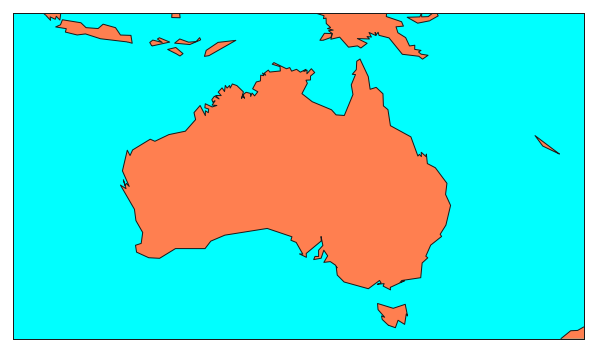

In [14]:
# Show a simple map of Australia

from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
plt.figure(figsize=(12,6))
map = Basemap(llcrnrlon=100, llcrnrlat=-45, urcrnrlon=170, urcrnrlat=-5)
map.drawmapboundary(fill_color='aqua')
map.fillcontinents(color='coral',lake_color='aqua')
map.drawcoastlines()

plt.show()

In [15]:
import pandas as pd

df = pd.read_csv('stations.csv')
df[:5]

,stn_num,stn_name,lat,lon,altitude,date_opened
0,1019,Kalumburu,-14.30,126.65,23,1941
1,2012,Halls Creek,-18.23,127.66,422,1910
2,3003,Broome Airport,-17.95,122.24,7,1910
3,4032,Port Hedland,-20.37,118.63,6,1912
4,4106,Marble Bar,-21.18,119.75,182,1910


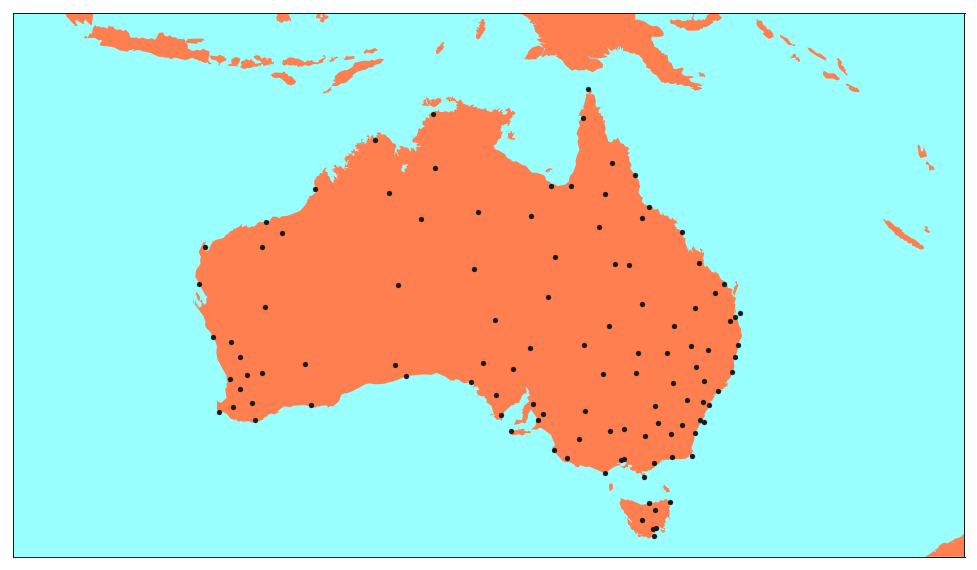

In [16]:
# Show a map of Australia with ACORN-SAT stations

from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
import pandas as pd

%matplotlib inline

df = pd.read_csv('stations.csv')

plt.figure(figsize=(20,10))
map = Basemap(llcrnrlon=100, llcrnrlat=-45, urcrnrlon=170, urcrnrlat=-5, resolution='l')
map.drawmapboundary(fill_color='#99ffff')
map.fillcontinents(color='coral',lake_color='#99ffff')
map.scatter(df['lon'], df['lat'], 25, marker='o',color='k', zorder=50)

plt.show()

In [ ]:
import numpy as np
import scipy.spatial 
from graphviz import Digraph

latlon = list(zip(df['lat'], df['lon']))

tree = scipy.spatial.cKDTree(latlon)
dd, ii = tree.query(latlon, k=4)
dot = Digraph()

for x in df["stn_num"]:
   dot.node(str(x))
    
for line in ii:
   for x in line[1:]:
        dot.edges([(str(df["stn_num"][line[0]]), str(df["stn_num"][x]))])

dot.render(view=True)

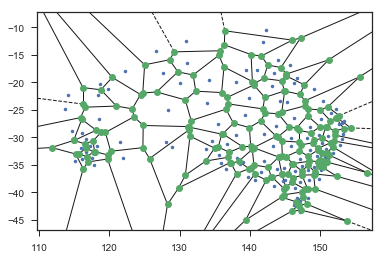

In [17]:
from scipy.spatial import Voronoi, voronoi_plot_2d
import matplotlib.pyplot as plt

lonlat = list(zip(df['lon'], df['lat']))
vor = Voronoi(lonlat)
voronoi_plot_2d(vor)

plt.show()

# See: http://schweitzer.id.au/acorn_sat/voronoi2.html

[Voronoi](http://schweitzer.id.au/acorn_sat/voronoi2.html)

Leaving out Cartopy

# Bokeh

[Gallery](https://bokeh.pydata.org/en/latest/docs/gallery.html)

In [18]:
from __future__ import print_function

import numpy as np
import pandas as pd

from bokeh.util.browser import view
from bokeh.document import Document
from bokeh.embed import file_html
from bokeh.layouts import gridplot
from bokeh.models.glyphs import Circle, Line
from bokeh.models import ColumnDataSource, Grid, LinearAxis, Plot, Range1d
from bokeh.resources import INLINE

raw_columns=[
[10.0,   8.04,   10.0,   9.14,   10.0,   7.46,   8.0,    6.58],
[8.0,    6.95,   8.0,    8.14,   8.0,    6.77,   8.0,    5.76],
[13.0,   7.58,   13.0,   8.74,   13.0,   12.74,  8.0,    7.71],
[9.0,    8.81,   9.0,    8.77,   9.0,    7.11,   8.0,    8.84],
[11.0,   8.33,   11.0,   9.26,   11.0,   7.81,   8.0,    8.47],
[14.0,   9.96,   14.0,   8.10,   14.0,   8.84,   8.0,    7.04],
[6.0,    7.24,   6.0,    6.13,   6.0,    6.08,   8.0,    5.25],
[4.0,    4.26,   4.0,    3.10,   4.0,    5.39,   19.0,   12.5],
[12.0,   10.84,  12.0,   9.13,   12.0,   8.15,   8.0,    5.56],
[7.0,    4.82,   7.0,    7.26,   7.0,    6.42,   8.0,    7.91],
[5.0,    5.68,   5.0,    4.74,   5.0,    5.73,   8.0,    6.89]]

quartet = pd.DataFrame(data=raw_columns, columns=
                       ['Ix','Iy','IIx','IIy','IIIx','IIIy','IVx','IVy'])


circles_source = ColumnDataSource(
    data = dict(
        xi   = quartet['Ix'],
        yi   = quartet['Iy'],
        xii  = quartet['IIx'],
        yii  = quartet['IIy'],
        xiii = quartet['IIIx'],
        yiii = quartet['IIIy'],
        xiv  = quartet['IVx'],
        yiv  = quartet['IVy'],
    )
   )

x = np.linspace(-0.5, 20.5, 10)
y = 3 + 0.5 * x
lines_source = ColumnDataSource(data=dict(x=x, y=y))

xdr = Range1d(start=-0.5, end=20.5)
ydr = Range1d(start=-0.5, end=20.5)

def make_plot(title, xname, yname):
    plot = Plot(x_range=xdr, y_range=ydr, plot_width=400, plot_height=400,
                border_fill_color='white', background_fill_color='#e9e0db')
    plot.title.text = title
    
    xaxis = LinearAxis(axis_line_color=None)
    plot.add_layout(xaxis, 'below')

    yaxis = LinearAxis(axis_line_color=None)
    plot.add_layout(yaxis, 'left')

    plot.add_layout(Grid(dimension=0, ticker=xaxis.ticker))
    plot.add_layout(Grid(dimension=1, ticker=yaxis.ticker))

    line = Line(x='x', y='y', line_color="#666699", line_width=2)
    plot.add_glyph(lines_source, line)

    circle = Circle(
        x=xname, y=yname, size=12,
        fill_color="#cc6633", line_color="#cc6633", fill_alpha=0.5
    )
    plot.add_glyph(circles_source, circle)

    return plot

I   = make_plot('I',   'xi',   'yi')
II  = make_plot('II',  'xii',  'yii')
III = make_plot('III', 'xiii', 'yiii')
IV  = make_plot('IV',  'xiv',  'yiv')

# grid = gridplot([[I, II], [III, IV]], toolbar_location=None)
grid = gridplot([[I, II], [III, IV]], toolbar_location='below')

doc = Document()
doc.add_root(grid)


doc.validate()
filename = "anscombe.html"
with open(filename, "w") as f:
    f.write(file_html(doc, INLINE, "Anscombe's Quartet"))
print("Wrote %s" % filename)
view(filename)

Wrote anscombe.html


In [ ]:
from bokeh.plotting import figure, show, output_notebook
from bokeh.sampledata.iris import flowers

%matplotlib inline

output_notebook()

colormap = {'setosa': 'red', 'versicolor': 'green', 'virginica': 'blue'}
colors = [colormap[x] for x in flowers['species']]

p = figure(title = "Iris Morphology")
p.xaxis.axis_label = 'Petal Length'
p.yaxis.axis_label = 'Petal Width'

p.circle(flowers["petal_length"], flowers["petal_width"],
         color=colors, fill_alpha=0.2, size=10)

# output_file("iris.html", title="iris.py example")

show(p)

In [20]:
# Joyplots

from numpy import linspace
from scipy.stats.kde import gaussian_kde

from bokeh.io import output_file, show
from bokeh.models import ColumnDataSource, FixedTicker, PrintfTickFormatter
from bokeh.plotting import figure
from bokeh.sampledata.perceptions import probly

import colorcet as cc

%matplotlib inline

output_file("joyplot.html")

def joy(category, data, scale=20):
    return list(zip([category]*len(data), scale*data))

cats = list(reversed(probly.keys()))

palette = [cc.rainbow[i*15] for i in range(17)]

x = linspace(-20,110, 500)

source = ColumnDataSource(data=dict(x=x))

p = figure(y_range=cats, plot_width=900, x_range=(-5, 105), toolbar_location=None)

for i, cat in enumerate(reversed(cats)):
    pdf = gaussian_kde(probly[cat])
    y = joy(cat, pdf(x))
    source.add(y, cat)
    p.patch('x', cat, color=palette[i], alpha=0.6, line_color="black", source=source)

p.outline_line_color = None
p.background_fill_color = "#efefef"

p.xaxis.ticker = FixedTicker(ticks=list(range(0, 101, 10)))
p.xaxis.formatter = PrintfTickFormatter(format="%d%%")

p.ygrid.grid_line_color = None
p.xgrid.grid_line_color = "#dddddd"
p.xgrid.ticker = p.xaxis[0].ticker

p.axis.minor_tick_line_color = None
p.axis.major_tick_line_color = None
p.axis.axis_line_color = None

p.y_range.range_padding = 0.12

show(p)

# Plotly

In [21]:
import plotly.plotly as py
import plotly.figure_factory as ff
import pandas as pd

df = pd.read_csv("school_earnings.csv")

table = ff.create_table(df)
py.iplot(table)

In [23]:
import plotly
from plotly.graph_objs import *
plotly.offline.init_notebook_mode(connected=True)


trace_women = Bar(x=df.School,
                  y=df.Women,
                  name='Women',
                  marker=dict(color='#ffcdd2'))

trace_men = Bar(x=df.School,
                y=df.Men,
                name='Men',
                marker=dict(color='#A2D5F2'))

trace_gap = Bar(x=df.School,
                y=df.Gap,
                name='Gap',
                marker=dict(color='#59606D'))

data = [trace_women, trace_men, trace_gap]
layout = Layout(title="Average Earnings for Graduates",
                xaxis=dict(title='School'),
                yaxis=dict(title='Salary (in thousands)'))
fig = Figure(data=data, layout=layout)

plotly.offline.iplot(fig)

# Maps

## Google Maps (and Highcharts)

* [ACORN-SAT](http://schweitzer.id.au/acorn_sat/acorn3.html)

* [Regional Water Information](http://www.bom.gov.au/water/rwi/#sf_tt/001/2017)
                             
* [ESCCI](http://reg.bom.gov.au/climate/reg/escci/#lon=152&lat=-32&zoom=1&start_date=2007-06-01&end_date=2007-06-30)

# Cesium

[USGS Earthquake Data](https://earthquake.usgs.gov/earthquakes/feed/v1.0/geojson.php)

In [ ]:
import mpl_toolkits 

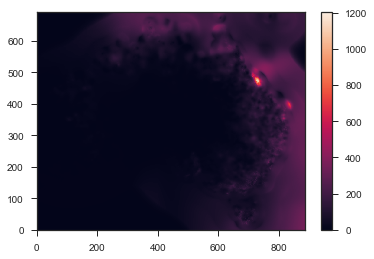

In [24]:
import netCDF4 as nc
import matplotlib.pyplot as plt

%matplotlib inline

dataset = nc.Dataset('rain_19700101.nc')
data = dataset.variables["rain_day"]
plt.pcolormesh(data[0])
plt.colorbar()

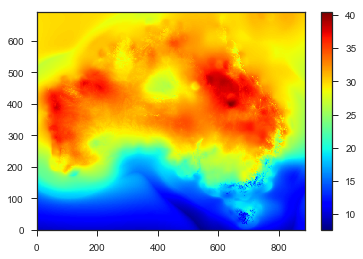

In [25]:
import netCDF4 as nc
import matplotlib.pyplot as plt

year = 1967
month = 2
day = 16

%matplotlib inline
url = 'http://opendap.bom.gov.au:8080/thredds/dodsC/agcd/tmax/mean/r005/01day/{year}/tmax_mean_r005_{year}{month:02d}{day:02d}_{year}{month:02d}{day:02d}.nc'.format(
    year=year, month=month, day=day)
# dataset = nc.Dataset('tmax_20180201.nc')
dataset = nc.Dataset(url)
data = dataset.variables["tmax"]
plt.pcolormesh(data[0], cmap='jet')
plt.colorbar()

In [ ]:
from bokeh.tile_providers import STAMEN_TERRAIN
import datashader as ds
import datashader.transfer_functions as tf
import pandas as pd

plot_width  = int(750)
plot_height = int(plot_width//1.2)

x_range, y_range = (11131949.079327356,15584728.711058298),  (-1118889.9748579608, -8399737.88981836)

def base_plot(tools='pan,wheel_zoom,reset',plot_width=plot_width, plot_height=plot_height, **plot_args):
    p = figure(tools=tools, plot_width=plot_width, plot_height=plot_height,
        x_range=x_range, y_range=y_range, outline_line_color=None,
        min_border=0, min_border_left=0, min_border_right=0,
        min_border_top=0, min_border_bottom=0, **plot_args)
    
    p.axis.visible = False
    p.xgrid.grid_line_color = None
    p.ygrid.grid_line_color = None
    return p



df = pd.read_csv('gpats.dat', names=['date', 'lat', 'lon', 'amp'], header=None)

p = base_plot()
p.add_tile(STAMEN_TERRAIN)

cvs = ds.Canvas(plot_width=1400, plot_height=1400)
agg = cvs.points(df, 'lon', 'lat', ds.mean('amp'))
img = tf.shade(agg, cmap=['lightblue', 'darkblue'])
show(p)


In [ ]:
import datashader as ds
from datashader.bokeh_ext import InteractiveImage
from functools import partial
from datashader.utils import export_image
from datashader.colors import colormap_select, Greys9, Hot, viridis, inferno
from IPython.core.display import HTML, display

background = "black"
export = partial(export_image, export_path="export", background=background)
cm = partial(colormap_select, reverse=(background=="black"))

#def create_image(x_range, y_range, w=plot_width, h=plot_height):
#    cvs = ds.Canvas(plot_width=w, plot_height=h, x_range=x_range, y_range=y_range)
#    agg = cvs.points(df, 'dropoff_x', 'dropoff_y',  ds.count('passenger_count'))
#    img = tf.shade(agg, cmap=Hot, how='eq_hist')
#    return tf.dynspread(img, threshold=0.5, max_px=4)

p = base_plot(background_fill_color=background)
export(create_image(*NYC),"NYCT_hot")
InteractiveImage(p, create_image)

In [ ]:
from pyproj import Proj, transform
print(transform(Proj(init='epsg:4326'), Proj(init='epsg:3857'), 140, -10))  # longitude first, latitude second.
# output (meters east of 0, meters north of 0): (-14314.651244750548, 6711665.883938471)

See: [Bokeh Demo](https://demo.bokehplots.com/apps/weather)

# Vega

[Vega Gallery](https://vega.github.io/vega-lite/examples/)

# Simulation of Parrondo's paradox

Problem from: https://fronkonstin.com/2014/12/16/the-awesome-parrondos-paradox/

Rules

* Coin 1: Probability of head=0.495 and probability of tail=0.505
* Coin 2: Probability of head=0.745 and probability of tail=0.255
* Coin 3: Probability of head=0.095 and probability of tail=0.905

Strategies

* Game A: You toss coin 1 and if it comes up head you receive 1€ but if not, you lose 1€
* Game B: If your present capital is a multiple of 3, you toss coin 2. If not, you toss coin 3. In both cases, you receive 1€ if coin comes up head and lose 1€ if not.

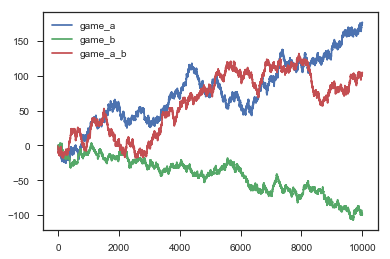

In [28]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Each coin returns true if it lands on heads...
def coin_1(): 
    return np.random.rand() < 0.495
def coin_2():
    return np.random.rand() < 0.745
def coin_3(): 
    return np.random.rand() < 0.095

def game_a(kitty):
    if coin_1():
        return kitty + 1
    else:
        return kitty - 1
    
def game_b(kitty):
    if kitty % 3:
        val = coin_2()
    else:
        val = coin_3()
    if val:
        return kitty + 1
    else:
        return kitty -1
    
def game_a_b(kitty):
    if np.random.rand() > 0.5:
        return game_a(kitty)
    else:
        return game_b(kitty)
    
def play(n, strategy):
    result = []
    kitty = 0
    for i in range(n):
        kitty = strategy(kitty)
        result.append(kitty)
    return result

p = play(10000, game_a)
plt.plot(p, label="game_a")
p = play(10000, game_b)
plt.plot(p, label="game_b")
p = play(10000, game_a_b)
plt.plot(p, label="game_a_b")
plt.legend()

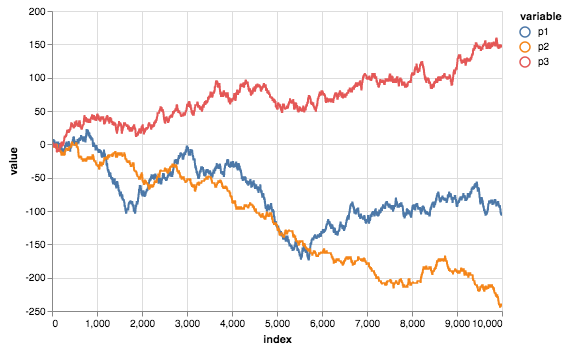

In [29]:
import numpy as np
import pandas as pd
import pdvega  # import adds vgplot attribute to pandas
import numpy as np

np.random.seed(5)

def coin_1(): 
    return np.random.rand() < 0.495
def coin_2():
    return np.random.rand() < 0.745
def coin_3(): 
    return np.random.rand() < 0.095

def game_a(kitty):
    if coin_1():
        return kitty + 1
    else:
        return kitty - 1
    
def game_b(kitty):
    if kitty % 3:
        val = coin_2()
    else:
        val = coin_3()
    if val:
        return kitty + 1
    else:
        return kitty -1
    
def game_a_b(kitty):
    if np.random.rand() > 0.5:
        return game_a(kitty)
    else:
        return game_b(kitty)
    
def play(n, strategy):
    result = []
    kitty = 0
    for i in range(n):
        kitty = strategy(kitty)
        result.append(kitty)
    return result

p1 = play(10000, game_a)
p2 = play(10000, game_b)
p3 = play(10000, game_a_b)

df = pd.DataFrame({'p1':p1, 'p2': p2, 'p3': p3})
df.vgplot()

# Conclusions

## Matplotlib

* The workhorse for Python
* Not much it can't do
* Useful for static plots
* Integrates well with Python's maths and science toolkits

## Seaborn

* Adds some style and flair to Matplotlib

## Bokeh

* Targets web pages
* Has a number of tools for interaction
* Easier learning curve than Matplotlib
* Looks good out of the box
* Integrates well with other libraries

## Plotly

* Based on commercial package
* Leverages D3 for graphics
* More extensive interaction than Bokeh

## PDVega

* Extends Pandas (already a very good package)
* Allows data to be exported with image
* Quite polished
* Works well with Jupyter Notebook

## Basemap

* Based on Matplotlib
* A little clunky

## Cartopy 

* Promise of a better basemap


## Google Maps

* Not really open source
* Easy things easy

## Leaflet

* Lightweight
* Quick to learn and use
* Supports many formats (e.g. WMS and GeoJSON)
* Supports plug-ins

## OpenLayers

* More features
* Supports more layer types
* Improved ease of use

## Cesium

* 3D
* Many features out of the box




# Recommendation

If working with Python, learn Pandas and use Pandas plotting for static plots or Vega for web.
